In [1]:
%matplotlib inline
import os
from tomato.audio.AudioAnalyzer import AudioAnalyzer
from tomato.symbolic.SymbTrAnalyzer import SymbTrAnalyzer
from tomato.joint.JointAnalyzer import JointAnalyzer
import pylab
pylab.rcParams['figure.figsize'] = (20, 8)


JointAnalyzer assumes the individual audio analysis and score analysis is applied earlier. 

In [2]:
# instantiate
audio_filepath = os.path.join('ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede',
                              'f970f1e0-0be9-4914-8302-709a0eac088e',
                              'f970f1e0-0be9-4914-8302-709a0eac088e.mp3')
audio_feature_filepath = os.path.join('ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede',
                                      'f970f1e0-0be9-4914-8302-709a0eac088e',
                                      'f970f1e0-0be9-4914-8302-709a0eac088e.pkl')
audio_features = AudioAnalyzer.from_pickle(audio_feature_filepath)

# score filepaths
score_filepath = os.path.join('ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede',
                              'ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt')
score_feature_filepath = os.path.join('ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede',
                                      'ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.pkl')
score_features = SymbTrAnalyzer.from_pickle(score_feature_filepath)

# instantiate analyzer object
jointAnalyzer = JointAnalyzer(verbose=True)


In [3]:
# TODO

... or call all the methods individually

In [4]:
tonic, tempo = jointAnalyzer.extract_tonic_tempo(score_filepath, score_features,
                                                 audio_filepath, audio_features['pitch'])

sections, notes, section_candidates = jointAnalyzer.align_audio_score(
    score_filepath, score_features, audio_filepath, audio_features['pitch'], tonic, tempo)

pitch_filtered, notes_filtered = jointAnalyzer.filter_pitch(audio_features['pitch'], notes)


- Extracting score-informed tonic and tempo of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Aligning audio recording ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3 and music score ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt.
- Filtering predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3 after audio-score alignment.


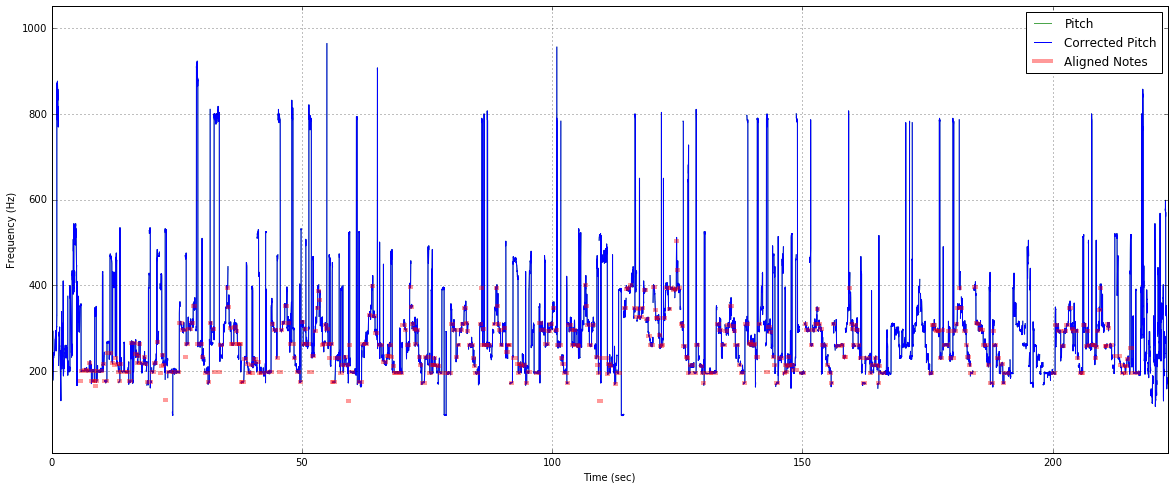

In [5]:
jointAnalyzer._alignedPitchFilter.plot(audio_features['pitch']['pitch'], pitch_filtered['pitch'], notes_filtered)


In [27]:
import pickle
pickle.dump([audio_features['pitch'], notes], open('temp_all.pkl', 'wb'))